In [1]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


# Library Model Time Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing

# Library Evaluasi
from sklearn.metrics import mean_absolute_error

In [2]:
# Load data dengan pandas dan assign ke variabel df
xls = pd.ExcelFile('kalbe_data.xlsx')
df_a1 = pd.read_excel(xls,'A1')
df_a2 = pd.read_excel(xls,'A2')
df_b1 = pd.read_excel(xls,'B1')
df_b2 = pd.read_excel(xls,'B2')

In [3]:
# Print Head A1
df_a1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [4]:
# Print Head A2
df_a2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [5]:
# Print Head B1
df_b1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0


In [6]:
# Print Head B2
df_b2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [7]:
# .info dari df_a1
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Dataset terdiri dari 90 data
- Tidak ada *missing values*
- Terdapat 1 *feature integer*, 2 *feature string*, 1 *feature float*

In [8]:
# .info dari df_a2
df_a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Dataset terdiri dari 90 data
- Tidak ada *missing values*
- Terdapat 1 *feature integer*, 2 *feature string*, 1 *feature float*

In [9]:
# .info dari df_b1
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Dataset terdiri dari 104 data
- Ada *missing values* pada *feature sales* sejumlah 14 data
- Terdapat 2 *feature integer*, 2 *feature string*, 1 *feature float*

In [10]:
# .info dari df_b2
df_b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Dataset terdiri dari 104 data
- Ada *missing values* pada *feature sales* sejumlah 84 data
- Terdapat 1 *feature integer*, 2 *feature string*, 1 *feature float*

In [11]:
# Membuat df kategori A
df_a = df_a1.copy()
df_a.rename(columns = {'Sales':'Sales_A1'}, inplace = True)

# Concat & rename
df_a = pd.concat([df_a, df_a2['Sales']], axis=1)
df_a.rename(columns = {'Sales':'Sales_A2'}, inplace = True)
df_a.replace(np.nan, 0, inplace=True)

# Menghitung total sales kategori A
df_a['sales_total'] = df_a['Sales_A1'] + df_a['Sales_A2']
df_a

,Day,Category,Product,Sales_A1,Sales_A2,sales_total
0,1,A,A1,100.000000,1000.000000,1100.000000
1,2,A,A1,101.000000,1005.000000,1106.000000
2,3,A,A1,102.010000,1010.025000,1112.035000
3,4,A,A1,103.030100,1015.075125,1118.105225
4,5,A,A1,104.060401,1020.150501,1124.210902
...,...,...,...,...,...,...
85,86,A,A1,196.980000,1527.971484,1724.951484
86,87,A,A1,197.964900,1535.611342,1733.576242
87,88,A,A1,198.954724,1543.289398,1742.244123
88,89,A,A1,199.949498,1551.005845,1750.955344


In [12]:
# Membuat df kategori B
df_b = df_b1.copy()
df_b.rename(columns = {'Sales':'Sales_B1'}, inplace = True)

# Concat & rename
df_b = pd.concat([df_b, df_b2['Sales']], axis=1)
df_b.rename(columns = {'Sales':'Sales_B2'}, inplace = True)
df_b.replace(np.nan, 0, inplace=True)

# Menghitung total sales kategori B
df_b['sales_total'] = df_b['Sales_B1'] + df_b['Sales_B2']
df_b

,Day,Category,Product,Sales_B1,Event,Sales_B2,sales_total
0,1,B,B1,990.0,0,0.0,990.0
1,2,B,B1,980.0,0,0.0,980.0
2,3,B,B1,1010.0,0,0.0,1010.0
3,4,B,B1,1010.0,0,0.0,1010.0
4,5,B,B1,1000.0,0,0.0,1000.0
...,...,...,...,...,...,...,...
99,100,B,B1,0.0,0,0.0,0.0
100,101,B,B1,0.0,1,0.0,0.0
101,102,B,B1,0.0,0,0.0,0.0
102,103,B,B1,0.0,0,0.0,0.0


In [13]:
# Pengecekan statistik deskriptif
df_a.describe()

,Day,Sales_A1,Sales_A2,sales_total
count,90.000000,90.000000,90.000000,90.000000
mean,45.500000,150.819298,1265.010398,1415.829695
std,26.124701,31.200698,164.440471,195.535549
min,1.000000,100.000000,1000.000000,1100.000000
25%,23.250000,122.718030,1122.953956,1245.671986
50%,45.500000,149.696822,1254.749873,1404.890486
75%,67.750000,178.000000,1402.011887,1580.011887
max,90.000000,210.000000,1558.760875,1767.805608


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 90 hari adalah 1.415
- *Sales* memiliki *range* 1.100 - 1.767

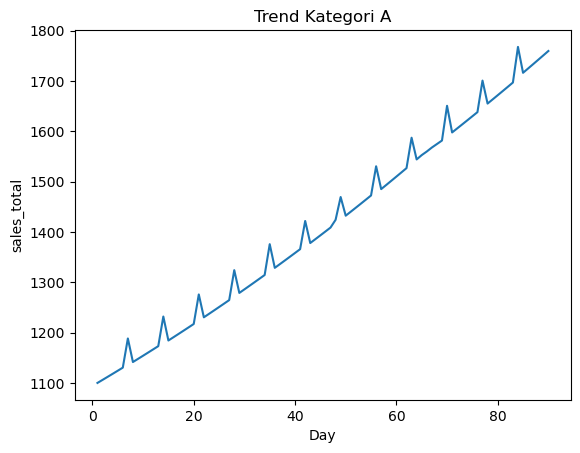

In [14]:
# Plot trend
sns.lineplot(x= df_a.Day, y= df_a.sales_total, data=df_a)
plt.title('Trend Kategori A')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Trend bersifat *additive* 
- Seasonal bersifat *additive* 

In [15]:
# Pengecekan statistik deskriptif
df_b.describe()

,Day,Sales_B1,Event,Sales_B2,sales_total
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,919.951923,0.115385,796.694921,1716.646844
std,30.166206,408.286982,0.321033,1664.297688,1776.808319
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26.750000,980.000000,0.000000,0.000000,980.000000
50%,52.500000,990.000000,0.000000,0.000000,1000.000000
75%,78.250000,1010.000000,0.000000,96.000000,1649.250000
max,104.000000,1734.000000,1.000000,4980.657414,6435.657414


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 104 hari adalah 1.716
- *Sales* memiliki *range* 0 - 6.435

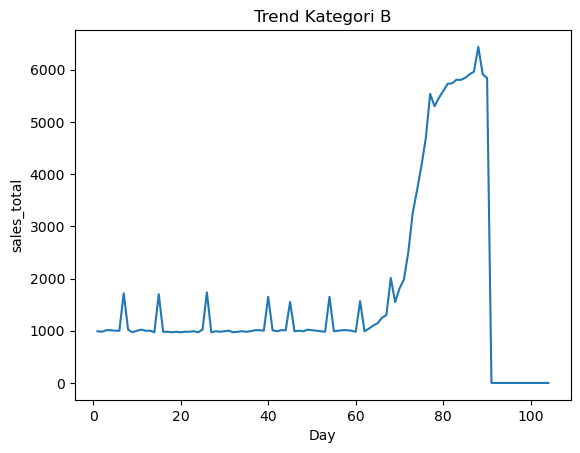

In [16]:
# Plot trend
sns.lineplot(x= df_b.Day, y= df_b.sales_total, data=df_b)
plt.title('Trend Kategori B')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Trend bersifat *multiplicative* 
- Seasonal bersifat *additive*

In [17]:
# Pengecekan unique values
df_a1['Category'].unique()

array(['A'], dtype=object)

In [18]:
# Pengecekan unique values
df_a1['Product'].unique()

array(['A1'], dtype=object)

Dari informasi diatas dapat disimpulkan bahwa :
- Tidak ada data dari kategori dan produk lain yang terselip pada *dataframe*

In [19]:
# Pengecekan range
print(df_a1['Day'].min())
print(df_a1['Day'].max())
print(df_a1['Day'].unique())

1
90
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


Dari informasi diatas dapat disimpulkan bahwa :
- Data diambil dari hari ke 1 sampai hari ke 90

In [20]:
# Pengecekan statistik deskriptif
df_a1.describe()

,Day,Sales
count,90.000000,90.000000
mean,45.500000,150.819298
std,26.124701,31.200698
min,1.000000,100.000000
25%,23.250000,122.718030
50%,45.500000,149.696822
75%,67.750000,178.000000
max,90.000000,210.000000


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 90 hari adalah 150
- *Sales* memiliki *range* 100-210

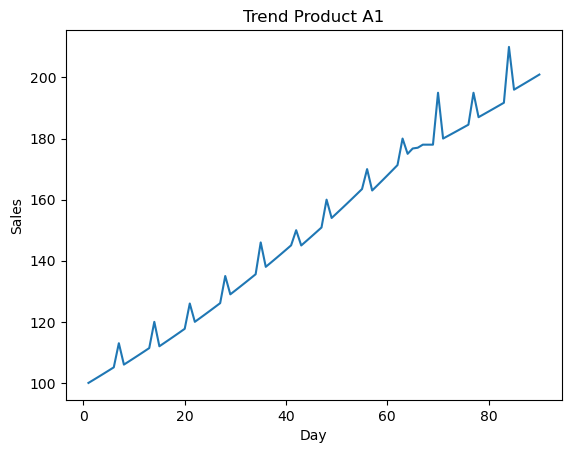

In [21]:
# Plot trend
sns.lineplot(x= df_a1.Day, y= df_a1.Sales, data=df_a1)
plt.title('Trend Product A1')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Trend bersifat *additive* 
- Seasonal bersifat *multiplicative*

In [22]:
# Pengecekan unique values
df_a2['Category'].unique()

array(['A'], dtype=object)

In [23]:
# Pengecekan unique values
df_a2['Product'].unique()

array(['A2'], dtype=object)

Dari informasi diatas dapat disimpulkan bahwa :
- Tidak ada data dari kategori dan produk lain yang terselip pada *dataframe*

In [24]:
# Pengecekan range
print(df_a2['Day'].min())
print(df_a2['Day'].max())
print(df_a2['Day'].unique())

1
90
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


Dari informasi diatas dapat disimpulkan bahwa :
- Data diambil dari hari ke 1 sampai hari ke 90

In [25]:
# Pengecekan statistik deskriptif
df_a2.describe()

,Day,Sales
count,90.000000,90.000000
mean,45.500000,1265.010398
std,26.124701,164.440471
min,1.000000,1000.000000
25%,23.250000,1122.953956
50%,45.500000,1254.749873
75%,67.750000,1402.011887
max,90.000000,1558.760875


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 90 hari adalah 1.265
- *Sales* memiliki *range* 1.000 -1.558,76

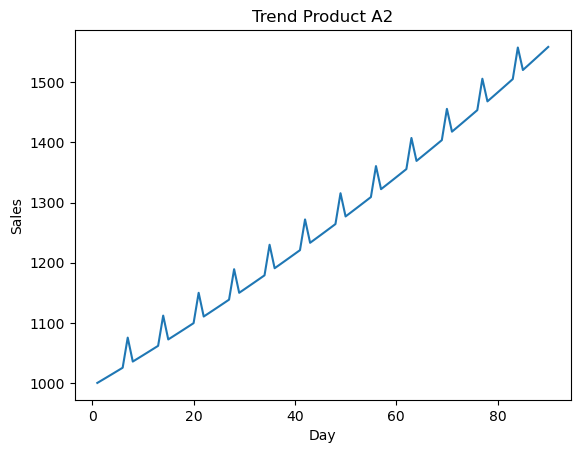

In [26]:
# Plot trend
sns.lineplot(x= df_a2.Day, y= df_a2.Sales, data=df_a2)
plt.title('Trend Product A2')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Trend dan Seasonal bersifat *additive* 

In [27]:
# Pengecekan unique values
df_b1['Category'].unique()

array(['B'], dtype=object)

In [28]:
# Pengecekan unique values
df_b1['Product'].unique()

array(['B1'], dtype=object)

Dari informasi diatas dapat disimpulkan bahwa :
- Tidak ada data dari kategori dan produk lain yang terselip pada *dataframe*

In [29]:
# Pengecekan range
print(df_b1['Day'].min())
print(df_b1['Day'].max())
print(df_b1['Day'].unique())

1
104
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


Dari informasi diatas dapat disimpulkan bahwa :
- Data diambil dari hari ke 1 sampai hari ke 104

In [30]:
# Pengecekan statistik deskriptif
df_b1.describe()

,Day,Sales,Event
count,104.000000,90.000000,104.000000
mean,52.500000,1063.055556,0.115385
std,30.166206,197.696872,0.321033
min,1.000000,970.000000,0.000000
25%,26.750000,980.000000,0.000000
50%,52.500000,1000.000000,0.000000
75%,78.250000,1010.000000,0.000000
max,104.000000,1734.000000,1.000000


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 90 hari adalah 1.063
- *Sales* memiliki *range* 970 - 1.734

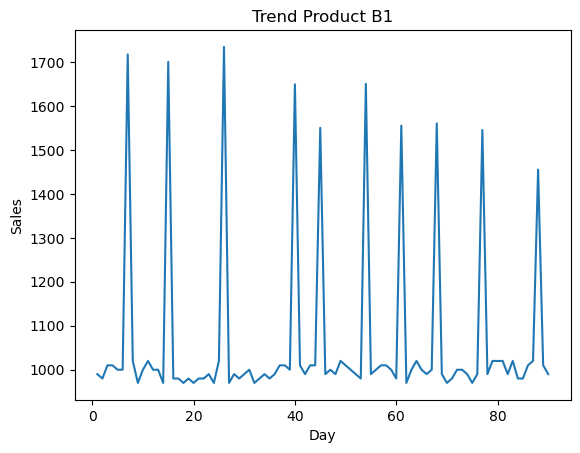

In [31]:
# Plot trend
sns.lineplot(x= df_b1.Day, y= df_b1.Sales, data=df_b1)
plt.title('Trend Product B1')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Trend bersifat *multiplicative*
- Seasonal bersifat *multiplicative*

In [32]:
# Pengecekan unique values
df_b2['Category'].unique()

array(['B'], dtype=object)

In [33]:
# Pengecekan unique values
df_b2['Product'].unique()

array(['B2'], dtype=object)

Dari informasi diatas dapat disimpulkan bahwa :
- Tidak ada data dari kategori dan produk lain yang terselip pada *dataframe*

In [34]:
# Pengecekan range
print(df_b2['Day'].min())
print(df_b2['Day'].max())
print(df_b2['Day'].unique())

1
104
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


Dari informasi diatas dapat disimpulkan bahwa :
- Data diambil dari hari ke 1 sampai hari ke 104

In [35]:
# Pengecekan statistik deskriptif
df_b2.describe()

,Day,Sales
count,104.000000,30.000000
mean,52.500000,2761.875726
std,30.166206,2055.025674
min,1.000000,10.000000
25%,26.750000,477.500000
50%,52.500000,3440.880000
75%,78.250000,4776.628424
max,104.000000,4980.657414


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata *sales* dalam 30 hari adalah 2.761,88
- *Sales* memiliki *range* 10 - 4.980,66

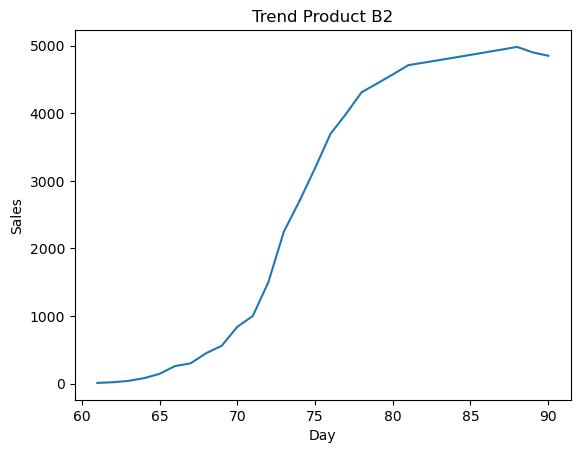

In [36]:
# Plot trend
sns.lineplot(x= df_b2.Day, y= df_b2.Sales, data=df_b2)
plt.title('Trend Product B2')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Trend* bersifat *multiplicative*
- *Seasonal* bersifat *multiplicative*

In [37]:
# Pengecekan data ulang
df_a.head()

,Day,Category,Product,Sales_A1,Sales_A2,sales_total
0,1,A,A1,100.000000,1000.000000,1100.000000
1,2,A,A1,101.000000,1005.000000,1106.000000
2,3,A,A1,102.010000,1010.025000,1112.035000
3,4,A,A1,103.030100,1015.075125,1118.105225
4,5,A,A1,104.060401,1020.150501,1124.210902


In [38]:
# Pengecekan null values
df_a.isnull().sum()

Day            0
Category       0
Product        0
Sales_A1       0
Sales_A2       0
sales_total    0
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category`, `Product`, `Sales_A1` & `Sales_A2`
- Set `Day` sebagai index

In [39]:
# Drop kolom `Category`, `Product`, `Sales_A1` & `Sales_A2`
df_a.drop(columns=['Category','Product', 'Sales_A1', 'Sales_A2'],inplace=True)

In [40]:
# Set kolom day sebagai index
df_a.set_index(keys='Day',inplace=True)

In [41]:
# Tampilkan data setelah pre-processing
df_a

,sales_total
Day,
1,1100.000000
2,1106.000000
3,1112.035000
4,1118.105225
5,1124.210902
...,...
86,1724.951484
87,1733.576242
88,1742.244123


In [42]:
# Pengecekan data ulang
df_b.head()

,Day,Category,Product,Sales_B1,Event,Sales_B2,sales_total
0,1,B,B1,990.0,0,0.0,990.0
1,2,B,B1,980.0,0,0.0,980.0
2,3,B,B1,1010.0,0,0.0,1010.0
3,4,B,B1,1010.0,0,0.0,1010.0
4,5,B,B1,1000.0,0,0.0,1000.0


In [43]:
# Pengecekan null values
df_b.isnull().sum()

Day            0
Category       0
Product        0
Sales_B1       0
Event          0
Sales_B2       0
sales_total    0
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category`, `Product`, `Sales_B1`, `Sales_B2` & `Event`
- Set `Day` sebagai index

In [44]:
# Drop kolom `Category`, `Product`, `Sales_B1`, `Sales_B2`, `Event`
df_b.drop(columns=['Category','Product', 'Sales_B1', 'Sales_B2', 'Event'],inplace=True)

In [45]:
# Set kolom day sebagai index
df_b.set_index(keys='Day',inplace=True)

In [46]:
# Drop null values pada sales
df_b.dropna(axis=0,inplace=True)

In [47]:
# Tampilkan data setelah pre-processing
df_b = df_b.loc[~(df_b==0).all(axis=1)]
df_b

,sales_total
Day,
1,990.000000
2,980.000000
3,1010.000000
4,1010.000000
5,1000.000000
...,...
86,5911.913082
87,5961.128387
88,6435.657414


In [48]:
# Pengecekan data ulang
df_a1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [49]:
# Pengecekan null values
df_a1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category` dan `Product` karena hanya memiliki 1 *value* pada *dataset* dan tidak digunakan untuk model *forecast*
- Set `Day` sebagai index

In [50]:
# Drop kolom category dan product
df_a1.drop(columns=['Category','Product'],inplace=True)

In [51]:
# Set kolom day sebagai index
df_a1.set_index(keys='Day',inplace=True)

In [52]:
# Tampilkan data setelah pre-processing
df_a1

,Sales
Day,
1,100.000000
2,101.000000
3,102.010000
4,103.030100
5,104.060401
...,...
86,196.980000
87,197.964900
88,198.954724


In [53]:
# Pengecekan data ulang
df_a2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [54]:
# Pengecekan null values
df_a2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category` dan `Product` karena hanya memiliki 1 *value* pada *dataset* dan tidak digunakan untuk model *forecast*
- Set `Day` sebagai index

In [55]:
# Drop kolom category dan product
df_a2.drop(columns=['Category','Product'],inplace=True)

In [56]:
# Set kolom day sebagai index
df_a2.set_index(keys='Day',inplace=True)

In [57]:
# Tampilkan data setelah pre-processing
df_a2

,Sales
Day,
1,1000.000000
2,1005.000000
3,1010.025000
4,1015.075125
5,1020.150501
...,...
86,1527.971484
87,1535.611342
88,1543.289398


In [58]:
# Pengecekan data ulang
df_b1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0


In [59]:
# Pengecekan null values
df_b1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category`, `Product` karena hanya memiliki 1 *value* pada *dataset* dan tidak digunakan untuk model *forecast*
- Drop *column* `Event` karena tidak digunakan untuk model *forecast*
- Drop *null values* karena **jumlah *null values* terlalu banyak, jika imputasi maka akan mempengaruhi *trend* dan *seasonality***
- Set `Day` sebagai index

In [60]:
# Drop kolom category dan product
df_b1.drop(columns=['Category','Product', 'Event'],inplace=True)

In [61]:
# Set kolom day sebagai index
df_b1.set_index(keys='Day',inplace=True)

In [62]:
# Drop null values pada sales
df_b1.dropna(axis=0,inplace=True)

In [63]:
# Tampilkan data setelah pre-processing
df_b1

,Sales
Day,
1,990.0
2,980.0
3,1010.0
4,1010.0
5,1000.0
...,...
86,1010.0
87,1020.0
88,1455.0


In [64]:
# Pengecekan data ulang
df_b2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [65]:
# Pengecekan null values
df_b2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

Dari informasi diatas maka saya akan melakukan pre-processing sebagai berikut :
- Drop *column* `Category`, `Product` karena hanya memiliki 1 *value* pada *dataset* dan tidak digunakan untuk model *forecast*
- Drop *null values* karena **jumlah *null values* terlalu banyak, jika imputasi maka akan mempengaruhi *trend* dan *seasonality***
- Set `Day` sebagai index

In [66]:
# Drop kolom category dan product
df_b2.drop(columns=['Category','Product'],inplace=True)

In [67]:
# Set kolom day sebagai index
df_b2.set_index(keys='Day',inplace=True)

In [68]:
# Drop null values pada sales
df_b2.dropna(axis=0,inplace=True)

In [69]:
# Tampilkan data setelah pre-processing
df_b2

,Sales
Day,
61,10.000000
62,20.000000
63,40.000000
64,80.000000
65,144.000000
66,259.200000
67,300.000000
68,450.000000
69,560.000000


In [70]:
# Definisi fungsi stationary
def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [71]:
# Fungsi untuk mencari model terbaik
def find_best_model(data,num_p,num_d,num_q):
    df=pd.DataFrame()
    pdq=[[],[],[]]
    aic=[] 
    for p in range(num_p+1): 
        for d in range(num_d+1):
          for q in range(num_q+1):
            
                try:
                    model=ARIMA(data,order=(p,d,q))
                    result=model.fit()
                    pdq[0].append(p)
                    pdq[1].append(d)
                    pdq[2].append(q)
                    aic.append(result.aic)
                except:
                    pass 
    df['p']=pdq[0]
    df['d']=pdq[1]
    df['q']=pdq[2]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.d.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [72]:
# Split train & Test
train_a = df_a[:70] 
test_a = df_a[70:] 

In [73]:
# Print Shape
print('Shape train_a ', train_a.shape)
print('Shape test_a ',test_a.shape)

Shape train_a  (70, 1)
Shape test_a  (20, 1)


In [74]:
# Check stationarity
check_stationarity(train_a)

ADF Statistic: 16.732784
p-value: 1.000000
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* masih belum stationer**. Oleh karena itu akan saya coba stationer-kan dengan differensiasi

In [75]:
# Differensiasi dataset
check_stationarity(train_a.diff().diff().dropna())

ADF Statistic: -6.730909
p-value: 0.000000
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Stationary


Dari informasi diatas dapat disimpulkan bahwa **butuh 2x differensiasi agar *dataset* stationer**

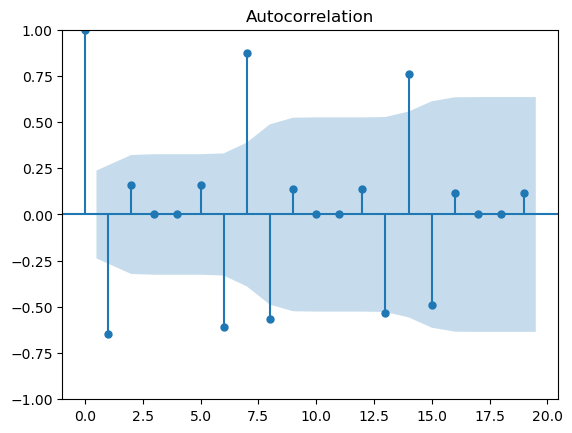

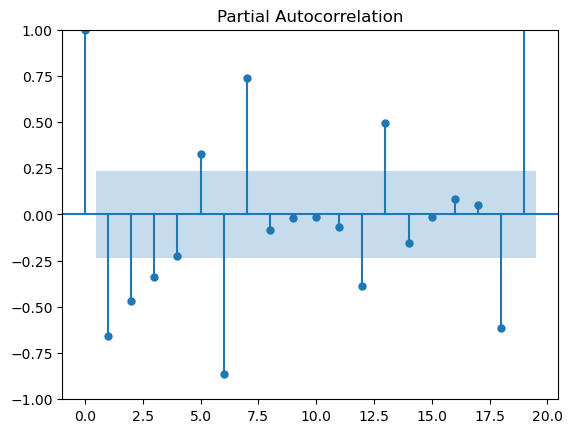

In [76]:
# Plot ACF & PACF
plot_acf(train_a.diff().diff().dropna())
plot_pacf(train_a.diff().diff().dropna())
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa, kira-kira order yang dibutuhkan adalah :
- AR : 3
- Differensiasi : 2
- MA : 2

In [77]:
# Validasi order yang dibutuhkan
find_best_model(train_a,10,2,10)

(6,
 2,
 1,
 366.12504617108897,
      p  d  q         AIC
 221  6  2  1  366.125046
 222  6  2  2  366.496488
 256  7  2  3  370.114381
 255  7  2  2  371.417635
 257  7  2  4  371.606639
 ..  .. .. ..         ...
 4    0  0  4  719.288712
 3    0  0  3  755.891794
 2    0  0  2  769.579913
 1    0  0  1  820.620946
 0    0  0  0  901.288055
 
 [363 rows x 4 columns])

Dari informasi diatas dapat disimpulkan bahwa terdapat **perubahan *order* AR dari 3 menjadi 6**. Untuk MA saya akan tetap menggunakan nilai awal yaitu 2. Kemudian saya akan coba *training* model dengan *order* yang sudah didapatkan. Sehingga order yang digunakan untuk *training* adalah :
- AR : 6
- Differencing : 2
- MA : 2

In [78]:
# Training Model
model_a=ARIMA(train_a, order=(6,2,2))
model_a_res = model_a.fit()
print('The AIC is',model_a_res.aic)

The AIC is 366.496487523149


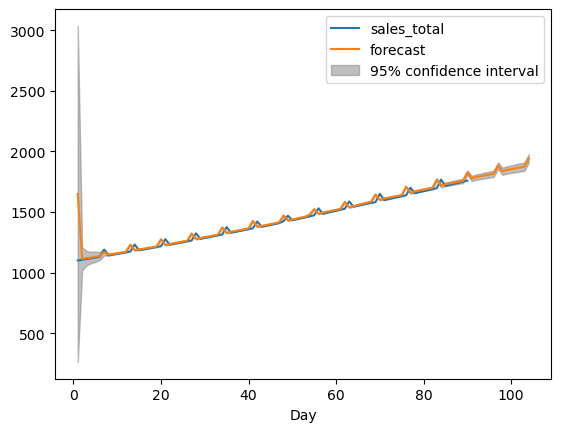

In [79]:
# Membuat plot sales vs forecast
fig, ax = plt.subplots()
ax = df_a['sales_total'].plot(ax=ax)
plot_predict(model_a_res, 1, 104, ax=ax)
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast sudah mendekati aktual. Yang artinya **model dapat memodelkan trend dan seasonality pada dataset**

In [80]:
# Prediksi 
y_pred_a = pd.Series(np.array(model_a_res.forecast(34)),index=np.arange(1,35))
y_pred_a=pd.DataFrame(y_pred_a)
y_pred_a.columns=['Sales']


In [81]:
# Split y_prediksi
y_pred_test_a = y_pred_a[:20]
y_pred_14days_a = y_pred_a[20:]

In [82]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
a_pred = pd.DataFrame({'actual': test_a['sales_total'].values,
                'prediction' : y_pred_test_a['Sales'].values})
a_pred['indicator'] = np.where(a_pred['prediction'] > a_pred['actual'], 'higher', 'lower')
a_pred_group = a_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
a_pred_group

,indicator,counts
0,higher,17
1,lower,3


In [83]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_a, y_pred_test_a))

MAE test =  3.6953320099278018


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 3,69. Contohnya jika hasil prediksi sales adalah 1.000 maka ada kemungkinan sales aktualnya 1.103,69 atau bisa juga 1.096,31. **Error ini termasuk kecil karena *range* sales pada kategori A berkisar antara 1.100-1.767**
- Model cenderung memprediksi sales lebih tinggi dari nilai aktual

In [84]:
# Print Prediksi 14 hari kedepan
y_pred_14days_a

,Sales
21,1825.131134
22,1777.284907
23,1788.439121
24,1794.987498
25,1802.703202
26,1809.279035
27,1815.947018
28,1883.257112
29,1836.101561
30,1847.341251


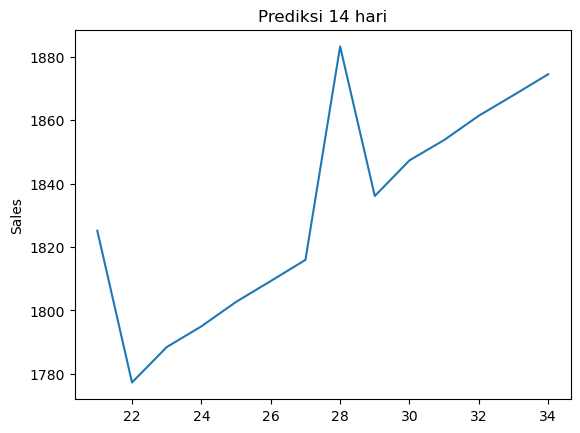

In [85]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_a.index, y=y_pred_14days_a.Sales, data=y_pred_14days_a )
plt.title('Prediksi 14 hari')
plt.show()

In [86]:
# Split train & Test
train_b = df_b[:85] 
test_b = df_b[85:] 

In [87]:
# Print Shape
print('Shape train_b ', train_b.shape)
print('Shape test_b ',test_b.shape)

Shape train_b  (85, 1)
Shape test_b  (5, 1)


In [88]:
# Check stationarity
check_stationarity(train_b)

ADF Statistic: 1.680337
p-value: 0.998080
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* masih belum stationer**. Oleh karena itu akan saya coba stationer-kan dengan differensiasi

In [89]:
# Differensiasi dataset
check_stationarity(train_b.diff().diff().dropna())

ADF Statistic: -8.984070
p-value: 0.000000
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Stationary


Dari informasi diatas dapat disimpulkan bahwa **butuh 2x differensiasi agar *dataset* stationer**

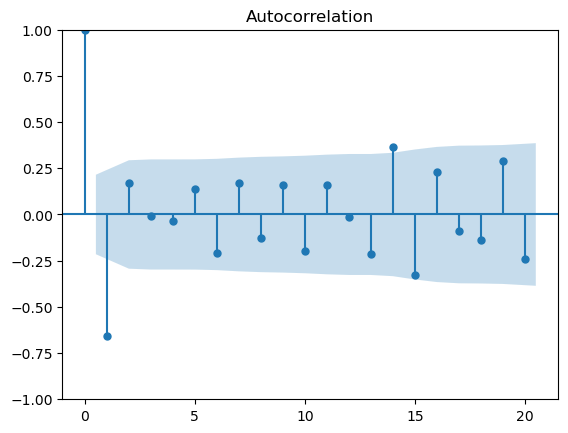

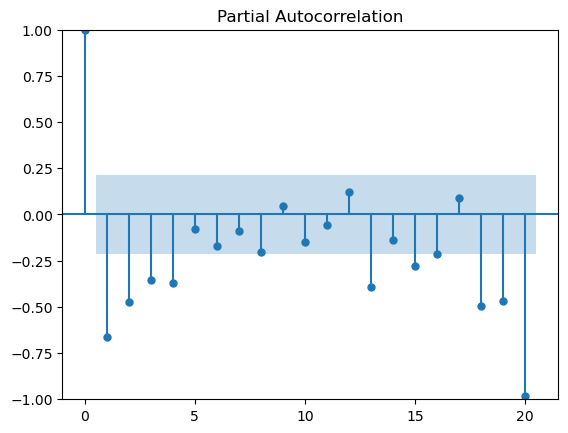

In [90]:
# Plot ACF & PACF
plot_acf(train_b.diff().diff().dropna())
plot_pacf(train_b.diff().diff().dropna())
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa, kira-kira order yang dibutuhkan adalah :
- AR : 4
- Differensiasi : 2
- MA : 1

In [91]:
# Training Model
model_b=ARIMA(train_b, order=(8,2,1))
model_b_res = model_b.fit()
print('The AIC is',model_b_res.aic)

The AIC is 1207.9649301888282


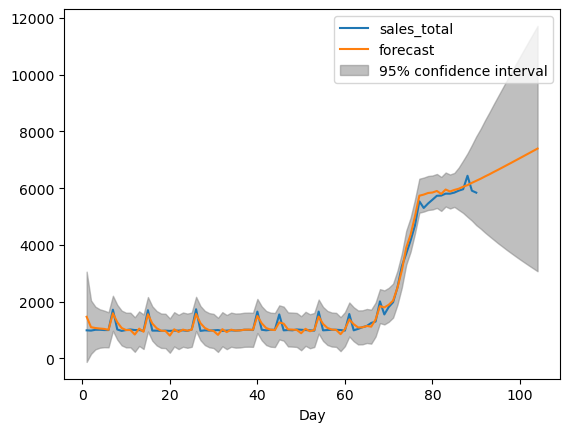

In [92]:
# Membuat plot sales vs forecast
fig, ax = plt.subplots()
ax = df_b['sales_total'].plot(ax=ax)
plot_predict(model_b_res, 1, 104, ax=ax)
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast sudah mendekati aktual. Yang artinya **model dapat memodelkan trend dan seasonality pada dataset**

In [93]:
# Prediksi 
y_pred_b = pd.Series(np.array(model_b_res.forecast(19)),index=np.arange(1,20))
y_pred_b=pd.DataFrame(y_pred_b)
y_pred_b.columns=['Sales']

In [94]:
# Split y_prediksi
y_pred_test_b = y_pred_b[:5]
y_pred_14days_b = y_pred_b[5:]

In [95]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
b_pred = pd.DataFrame({'actual': test_b['sales_total'].values,
                'prediction' : y_pred_test_b['Sales'].values})
b_pred['indicator'] = np.where(b_pred['prediction'] > b_pred['actual'], 'higher', 'lower')
b_pred_group = b_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
b_pred_group

,indicator,counts
0,higher,4
1,lower,1


In [96]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_b, y_pred_test_b))

MAE test =  194.4805912950216


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 194,48. Contohnya jika hasil prediksi sales adalah 5.700 maka ada kemungkinan sales aktualnya 5.894,48 atau bisa juga 5.505,52. **Error ini termasuk kecil karena *range* sales pada kategori B berkisar antara 970-6.435**
- Model cenderung memprediksi sales lebih tinggi dari nilai aktual

In [97]:
# Print Prediksi 14 hari kedepan
y_pred_14days_b 

,Sales
6,6259.310003
7,6330.959342
8,6411.815431
9,6486.678709
10,6569.468156
11,6647.808498
12,6729.781150
13,6811.608107
14,6893.247645
15,6976.785245


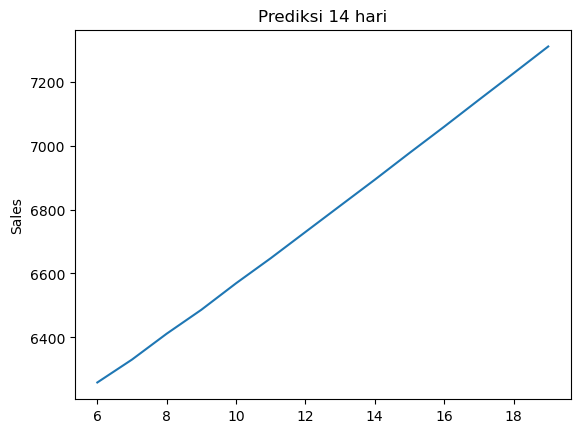

In [98]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_b.index, y=y_pred_14days_b.Sales, data=y_pred_14days_b )
plt.title('Prediksi 14 hari')
plt.show()

In [99]:
# Split train & Test
train_a1 = df_a1[:70] 
test_a1 = df_a1[70:] 

In [100]:
# Print Shape
print('Shape train_a1 ', train_a1.shape)
print('Shape test_a1 ',test_a1.shape)

Shape train_a1  (70, 1)
Shape test_a1  (20, 1)


In [101]:
# Check stationarity
check_stationarity(train_a1)

ADF Statistic: 3.586134
p-value: 1.000000
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* masih belum stationer**. Oleh karena itu akan saya coba stationer-kan dengan differensiasi

In [102]:
# Differensiasi dataset
check_stationarity(train_a1.diff().diff().dropna())

ADF Statistic: -6.511856
p-value: 0.000000
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Stationary


Dari informasi diatas dapat disimpulkan bahwa **butuh 2x differensiasi agar *dataset* stationer**

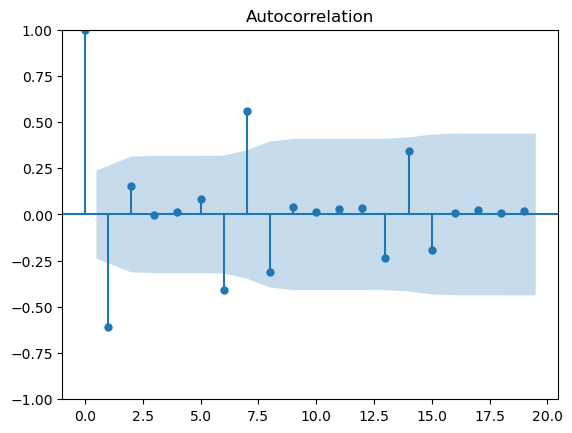

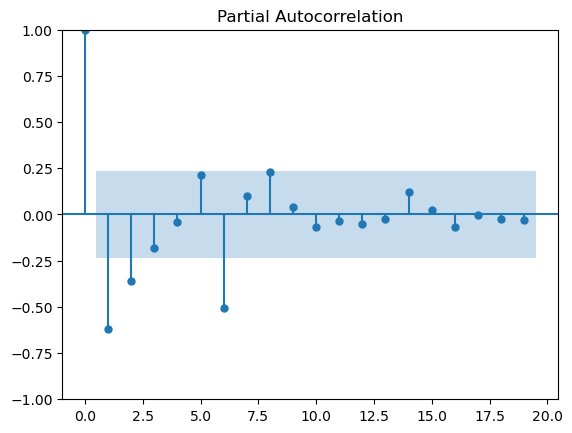

In [103]:
# Plot ACF & PACF
plot_acf(train_a1.diff().diff().dropna())
plot_pacf(train_a1.diff().diff().dropna())
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa, kira-kira order yang dibutuhkan adalah :
- AR : 2
- Differensiasi : 2
- MA : 1

In [104]:
# Training Model
model_a1=ARIMA(train_a1, order=(10,2,1)) 
model_a1_res = model_a1.fit()
print('The AIC is',model_a1_res.aic)

The AIC is 332.98385129870024


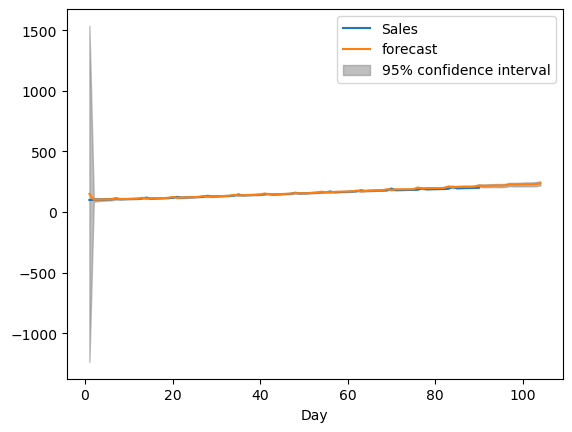

In [105]:
# Membuat plot sales vs forecast
fig, ax = plt.subplots()
ax = df_a1['Sales'].plot(ax=ax)
plot_predict(model_a1_res, 1, 104, ax=ax)
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast sudah mendekati aktual. Yang artinya **model dapat memodelkan trend dan seasonality pada dataset**

Kemudian evaluasi berdasarkan *metrics* yang ditentukan. Selain itu saya akan coba cek kecenderungan prediksi model

In [106]:
# Prediksi
y_pred_a1 = pd.Series(np.array(model_a1_res.forecast(34)),index=np.arange(1,35))
y_pred_a1=pd.DataFrame(y_pred_a1)
y_pred_a1.columns=['Sales']

In [107]:
# Split y_prediksi
y_pred_test_a1 = y_pred_a1[:20]
y_pred_14days_a1 = y_pred_a1[20:]

In [108]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
a1_pred = pd.DataFrame({'actual': test_a1['Sales'].values,
                'prediction' : y_pred_test_a1['Sales'].values})
a1_pred['indicator'] = np.where(a1_pred['prediction'] > a1_pred['actual'], 'higher', 'lower')
a1_pred_group = a1_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
a1_pred_group

,indicator,counts
0,higher,20


In [109]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_a1, y_pred_test_a1))

MAE test =  7.408273952839727


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 7,4. Contohnya jika hasil prediksi sales adalah 100 maka ada kemungkinan sales aktualnya 107,4 atau bisa juga 92.6.**Error ini termasuk kecil karena *range* sales pada produk A1 berkisar antara 100-210**
- Model cenderung memprediksi sales lebih tinggi dari nilai aktual

In [110]:
# Print Prediksi 14 hari kedepan
y_pred_14days_a1

,Sales
21,219.295886
22,216.418609
23,217.379091
24,218.451993
25,219.017622
26,218.650831
27,220.345013
28,228.148740
29,226.716857
30,227.443769


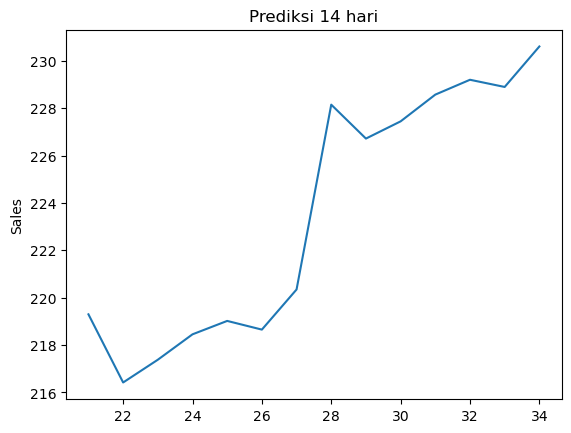

In [111]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_a1.index, y=y_pred_14days_a1.Sales, data=y_pred_14days_a1 )
plt.title('Prediksi 14 hari')
plt.show()

In [112]:
# Split train & Test
train_a2 = df_a2[:70] 
test_a2 = df_a2[70:] 

In [113]:
# Print Shape
print('Shape train_a2 ', train_a2.shape)
print('Shape test_a2 ',test_a2.shape)

Shape train_a2  (70, 1)
Shape test_a2  (20, 1)


In [114]:
# Check stationarity
check_stationarity(train_a2)

ADF Statistic: 97719045921917.031250
p-value: 1.000000
Critical Values:
	1%: -3.541
	5%: -2.909
	10%: -2.592
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* masih belum stationer**. Oleh karena itu akan saya coba stationer-kan dengan differensiasi

In [115]:
# Differensiasi dataset
check_stationarity(train_a2.diff().diff().diff().diff().dropna())

ADF Statistic: -291146093.485919
p-value: 0.000000
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Stationary


Dari informasi diatas dapat disimpulkan bahwa **butuh 4x differensiasi agar *dataset* stationer**

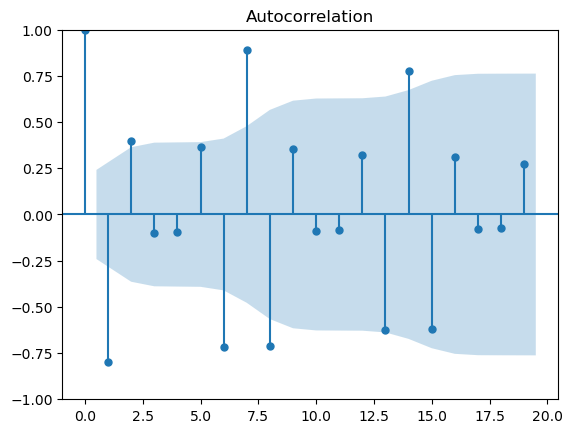

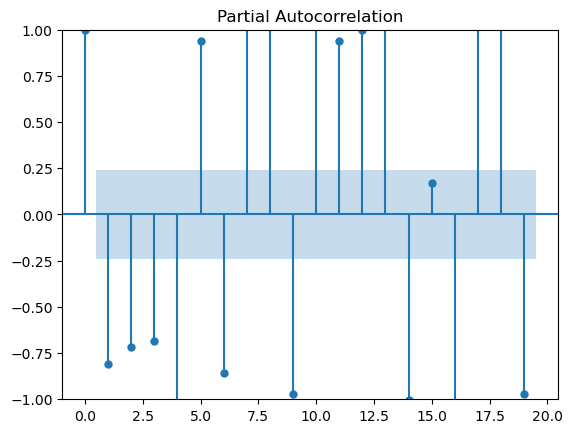

In [116]:
# Plot ACF & PACF
plot_acf(train_a2.diff().diff().diff().diff().dropna())
plot_pacf(train_a2.diff().diff().diff().diff().dropna())
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa, kira-kira order yang dibutuhkan adalah :
- AR : 3
- Differensiasi : 4
- MA : 2

In [117]:
# Validasi order yang dibutuhkan
find_best_model(train_a2,10,4,10)

(9,
 3,
 1,
 -56.008605610711655,
      p  d   q           AIC
 526  9  3   1 -5.600861e+01
 527  9  3   2 -5.398392e+01
 461  8  2   1 -4.684456e+01
 481  8  3  10 -4.204251e+01
 534  9  3   9 -3.256194e+01
 ..  .. ..  ..           ...
 29   0  2   7  8.151235e+07
 405  7  2   0  8.151235e+07
 406  7  2   1  8.191639e+07
 83   1  2   6  4.054642e+09
 159  2  4   5  6.189357e+10
 
 [599 rows x 4 columns])

Dari informasi diatas dapat disimpulkan bahwa **terdapat perubahan *order*** menjadi :
- AR : 9
- Differencing : 3
- MA : 1

In [118]:
# Training Model
model_a2=ARIMA(train_a2, order=(9,3,1)) 
model_a2_res = model_a2.fit()
print('The AIC is',model_a2_res.aic)

The AIC is -56.008605610711655


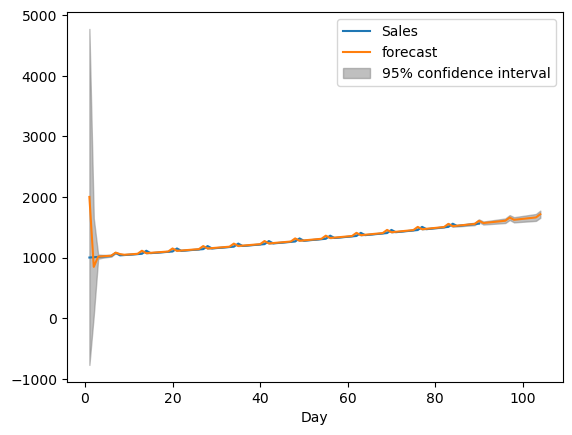

In [119]:
# Membuat plot sales vs forecast
fig, ax = plt.subplots()
ax = df_a2['Sales'].plot(ax=ax)
plot_predict(model_a2_res, 1, 104, ax=ax)
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast sudah mendekati aktual. Yang artinya **model dapat memodelkan trend dan seasonality pada dataset**

In [120]:
# Prediksi
y_pred_a2 = pd.Series(np.array(model_a2_res.forecast(34)),index=np.arange(1,35))
y_pred_a2=pd.DataFrame(y_pred_a2)
y_pred_a2.columns=['Sales']

In [121]:
# Split y_prediksi
y_pred_test_a2 = y_pred_a2[:20]
y_pred_14days_a2 = y_pred_a2[20:]

In [122]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
a2_pred = pd.DataFrame({'actual': test_a2['Sales'].values,
                'prediction' : y_pred_test_a2['Sales'].values})
a2_pred['indicator'] = np.where(a2_pred['prediction'] > a2_pred['actual'], 'higher', 'lower')
a2_pred_group = a2_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
a2_pred_group

,indicator,counts
0,lower,20


In [123]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_a2, y_pred_test_a2))

MAE test =  1.7322333218229802


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 1,73. Contohnya jika hasil prediksi sales adalah 1.000 maka ada kemungkinan sales aktualnya 1.001,73 atau bisa juga 998,27. **Error ini termasuk kecil karena *range* sales pada produk A2 berkisar antara 1.000-1.558**
- Model cenderung memprediksi sales lebih rendah dari nilai aktual

In [124]:
# Print Prediksi 14 hari kedepan
y_pred_14days_a2

,Sales
21,1606.712593
22,1569.234306
23,1576.788205
24,1584.256544
25,1591.725768
26,1599.277790
27,1607.000504
28,1659.782815
29,1622.595155
30,1630.433532


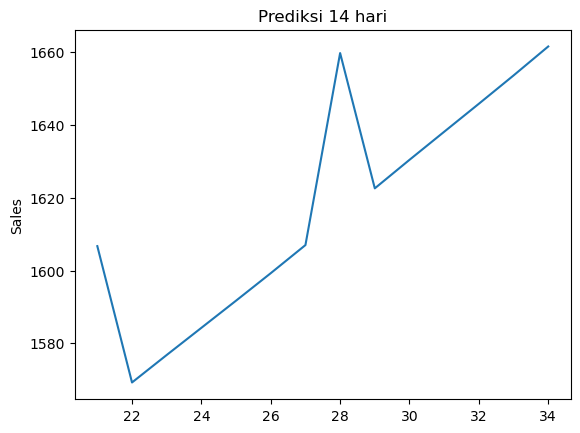

In [125]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_a2.index, y=y_pred_14days_a2.Sales, data=y_pred_14days_a2 )
plt.title('Prediksi 14 hari')
plt.show()

In [126]:
# Split train & Test
train_b1 = df_b1[:70] 
test_b1 = df_b1[70:] 

In [127]:
# Print Shape
print('Shape train_b1 ', train_b1.shape)
print('Shape test_b1 ',test_b1.shape)

Shape train_b1  (70, 1)
Shape test_b1  (20, 1)


In [128]:
# Check stationarity
check_stationarity(train_b1)

ADF Statistic: -9.326694
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
Stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* sudah stationer**

In [129]:
# Forecast menggunakan Holt Winter
y_pred_b1_visual = test_b1.copy()
winter_b1 = ExponentialSmoothing(np.asarray(train_b1['Sales']) ,seasonal_periods=12 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_pred_b1_visual['Holt_Winter'] = winter_b1.forecast(len(test_b1))

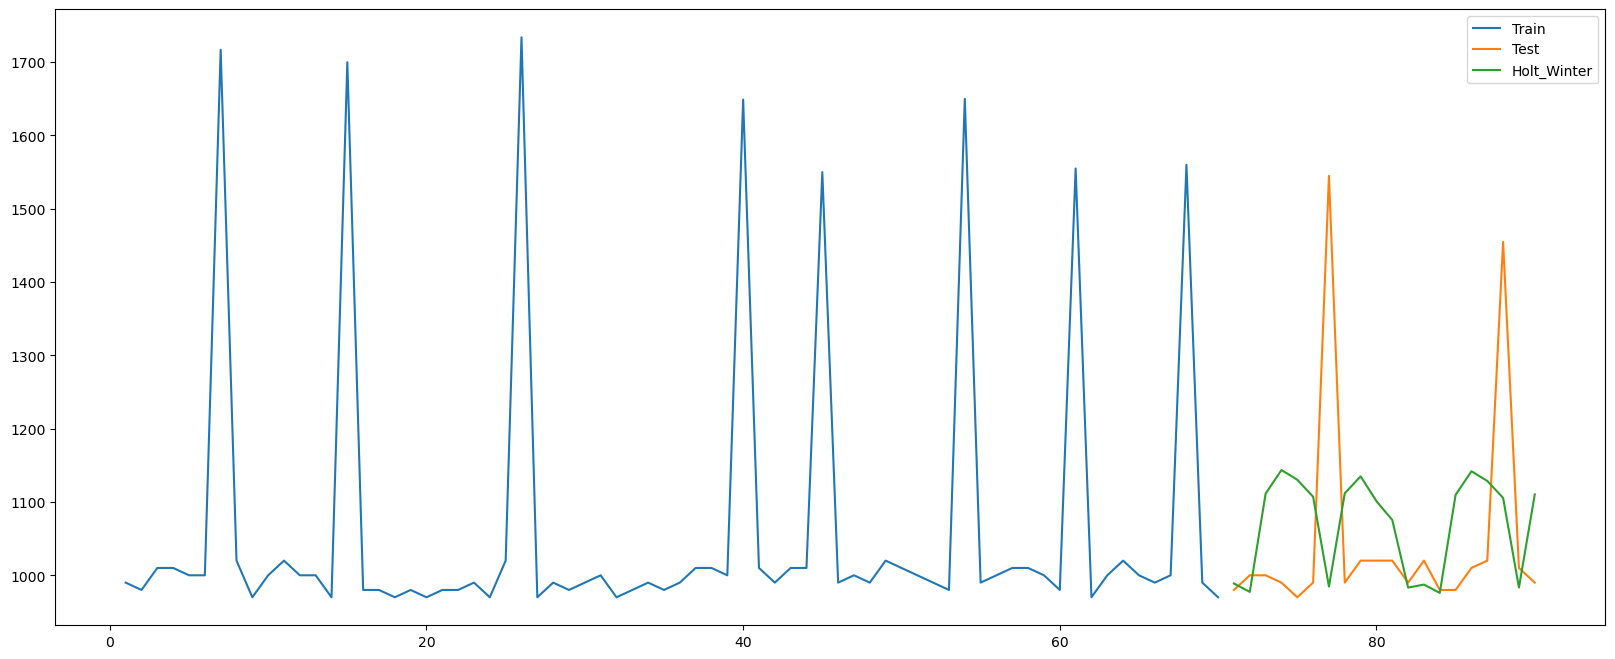

In [130]:
# Visualisasi Aktual vs Forecast
plt.figure(figsize=(20,8))
plt.plot( train_b1['Sales'], label='Train')
plt.plot(test_b1['Sales'], label='Test')
plt.plot(y_pred_b1_visual['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast masih lebih rendah dari pada aktual. **Model sudah dapat menangkap *seasonal* dari *dataset* akan tetapi model ini masih belum dapat menangkap *trend* dengan baik. Karena pola *trend* masih jauh dibawah aktual**

In [131]:
# Prediksi dengan Holt Winter
y_pred_b1_winter = pd.Series(np.array(winter_b1.forecast(34)),index=np.arange(1,35))
y_pred_b1_winter=pd.DataFrame(y_pred_b1_winter)
y_pred_b1_winter.columns=['Sales']

In [132]:
# Split y_prediksi
y_pred_test_b1_winter = y_pred_b1_winter[:20]
y_pred_14days_b1_winter = y_pred_b1_winter[20:]

In [133]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
b1_pred = pd.DataFrame({'actual': test_b1['Sales'].values,
                'prediction' : y_pred_test_b1_winter['Sales'].values})
b1_pred['indicator'] = np.where(b1_pred['prediction'] > b1_pred['actual'], 'higher', 'lower')
b1_pred_group = b1_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
b1_pred_group

,indicator,counts
0,higher,13
1,lower,7


In [134]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_b1, y_pred_test_b1_winter))

MAE test =  120.90489430946658


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 120,9. Contohnya jika hasil prediksi sales adalah 1.200 maka ada kemungkinan sales aktualnya 1320,9 atau bisa juga 1.079,1. **Error ini termasuk kecil karena *range* sales pada produk B1 berkisar antara 970-1.734**
- Model cenderung memprediksi sales lebih tinggi dari nilai aktual

In [135]:
# Print Prediksi 14 hari kedepan
y_pred_14days_b1_winter

,Sales
21,1133.377124
22,1099.532765
23,1073.862312
24,981.797142
25,985.923577
26,974.567419
27,1108.186510
28,1140.289988
29,1127.110023
30,1103.987288


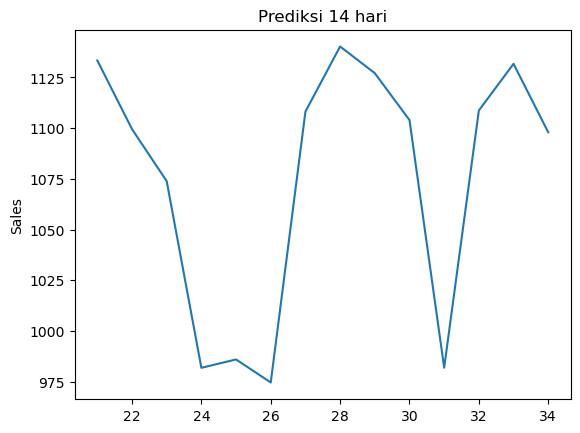

In [136]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_b1_winter.index, y=y_pred_14days_b1_winter.Sales, data=y_pred_14days_b1_winter )
plt.title('Prediksi 14 hari')
plt.show()

In [137]:
# Split train & Test
train_b2 =df_b2[:25] 
test_b2 =df_b2[25:] 

In [138]:
# Print Shape
print('Shape train_b2 ', train_b2.shape)
print('Shape test_b2 ',test_b2.shape)

Shape train_b2  (25, 1)
Shape test_b2  (5, 1)


In [139]:
# Check stationarity
check_stationarity(train_b2)

ADF Statistic: -1.227398
p-value: 0.661700
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa ***dataset* masih belum stationer**. Oleh karena itu akan saya coba stationer-kan dengan differensiasi

In [140]:
# Differensiasi dataset
check_stationarity(train_b2.diff().diff().diff().dropna())

ADF Statistic: -7.342768
p-value: 0.000000
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
Stationary


Dari informasi diatas dapat disimpulkan bahwa **butuh 3x differensiasi agar *dataset* stationer. Akan tetapi saya tidak menggunakan differensiasi karena jumlah data yang terlalu sedikit. Jika menggunakan differensiasi dikhawatirkan dataset akan kehilangan pola trend dan seasonality nya**

In [141]:
# Forecast menggunakan Holt Winter
y_pred_b2_visual = test_b2.copy()
winter_b2 = ExponentialSmoothing(np.asarray(train_b2['Sales']) ,seasonal_periods=12 ,trend='multiplicative', seasonal='additive',).fit()
y_pred_b2_visual['Holt_Winter'] = winter_b2.forecast(len(test_b2))

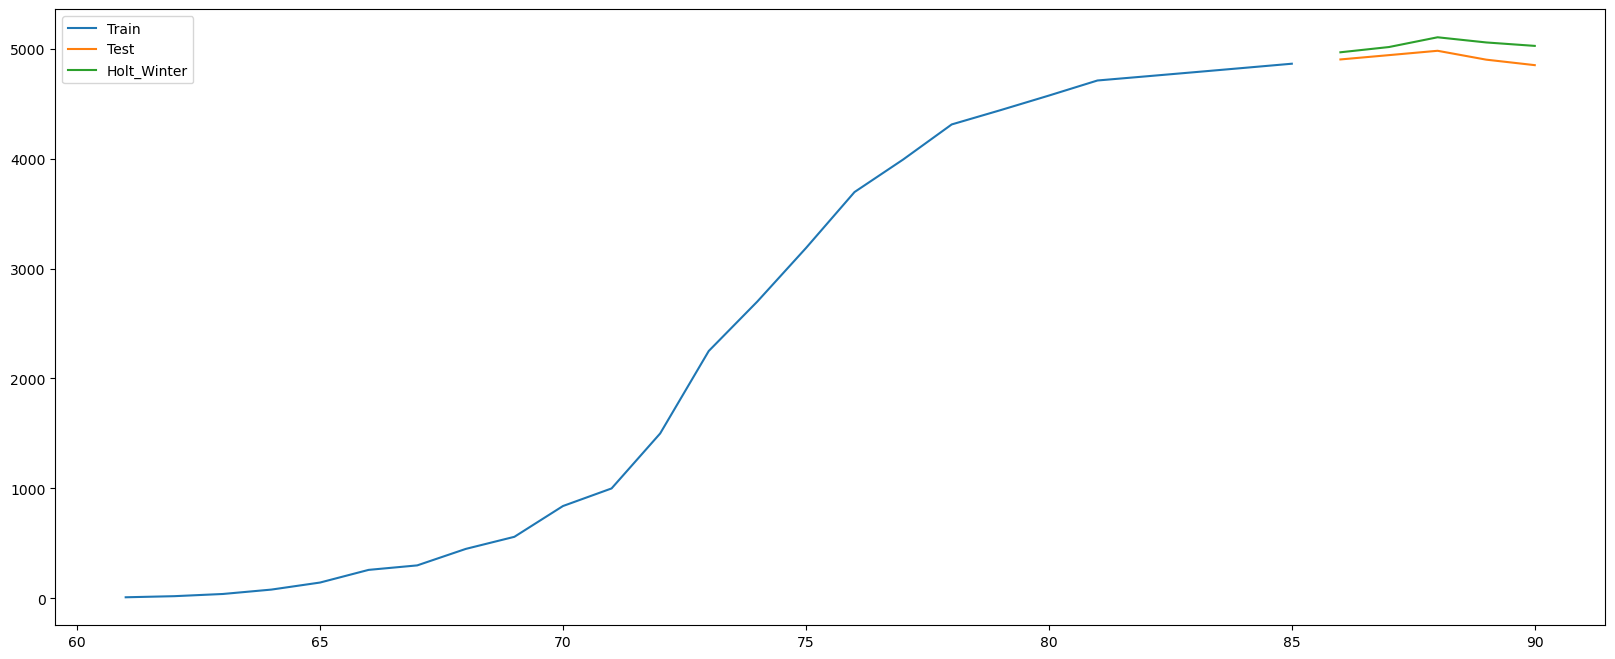

In [142]:
# Visualisasi Aktual vs Forecast
plt.figure(figsize=(20,8))
plt.plot( train_b2['Sales'], label='Train')
plt.plot(test_b2['Sales'], label='Test')
plt.plot(y_pred_b2_visual['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa forecast lebih tinggi dari pada aktual. **Model sudah dapat menangkap *seasonal* dari *dataset* akan tetapi model ini masih belum dapat menangkap *trend* dengan baik. Karena pola *trend* masih diatas aktual**

In [143]:
# Prediksi dengan Holt Winter
y_pred_b2_winter = pd.Series(np.array(winter_b2.forecast(19)),index=np.arange(1,20))
y_pred_b2_winter=pd.DataFrame(y_pred_b2_winter)
y_pred_b2_winter.columns=['Sales']

In [144]:
# Split y_prediksi
y_pred_test_b2_winter = y_pred_b2_winter[:5]
y_pred_14days_b2_winter = y_pred_b2_winter[5:]

In [145]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih & jumlah prediksi yang kurang
b2_pred = pd.DataFrame({'actual': test_b2['Sales'].values,
                'prediction' : y_pred_test_b2_winter['Sales'].values})
b2_pred['indicator'] = np.where(b2_pred['prediction'] > b2_pred['actual'], 'higher', 'lower')
b2_pred_group = b2_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
b2_pred_group

,indicator,counts
0,higher,5


In [146]:
# Evaluasi berdasarkan metrics
print('MAE test = ', mean_absolute_error(test_b2, y_pred_test_b2_winter))

MAE test =  118.66006043115195


Dari informasi diatas dapat disimpulkan bahwa :
- Model ini memiliki error sejumlah +- 118,66. Contohnya jika hasil prediksi sales adala 3.000 maka ada kemungkinan sales aktualnya 3.118,66 atau bisa juga 2.881,34. **Error ini termasuk kecil karena *range* sales pada produk B2 berkisar antara 10-4.980**
- Model cenderung memprediksi sales lebih tinggi dari nilai aktual

In [147]:
# Print Prediksi 14 hari kedepan
y_pred_14days_b2_winter

,Sales
6,4522.409544
7,4204.257850
8,3914.120257
9,3720.622673
10,3498.320311
11,3509.727827
12,3830.972285
13,3863.892744
14,3934.782558
15,4046.134131


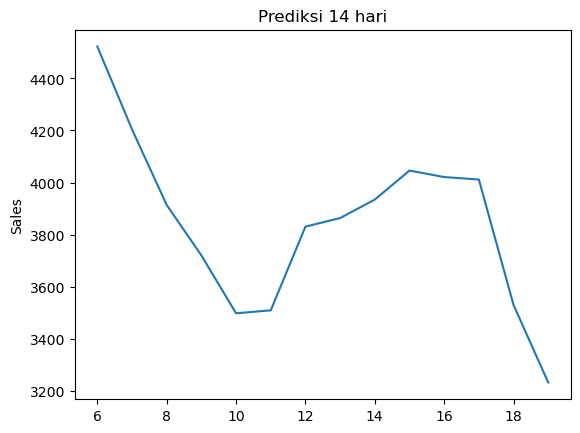

In [148]:
# Visualisasi Forecast
sns.lineplot(x=y_pred_14days_b2_winter.index, y=y_pred_14days_b2_winter.Sales, data=y_pred_14days_b2_winter )
plt.title('Prediksi 14 hari')
plt.show()

In [149]:
# Saving Model Kategori A
model_a_res.save('model_a.pkl')
# Saving Model Kategori B
model_b_res.save('model_b.pkl')
# Saving Model Produk A1
model_a1_res.save('model_a1.pkl')
# Saving Model Produk A2
model_a2_res.save('model_a2.pkl')
# Saving Model Produk B1
winter_b1.save('model_b1.pkl')
# Saving Model Produk B2
winter_b1.save('model_b2.pkl')

Kesimpulan dari *notebook* ini adalah :

- Sebelum membuat model maka saya perlu mengetahui dan eksplorasi mengenai data yang tersedia. Hasil eksplorasi adalah sebagai berikut :
    1. Produk Kategori A memiliki rata-rata sales 1.415 dan *range* 1.100 - 1.767
    2. Produk Kategori B memiliki rata-rata sales 1.716 dan *range* 0 - 6.435
    3. Produk A1 memiliki rata-rata sales 150 dan *range* 100 - 210
    4. Produk A2 memiliki rata-rata sales 1.265 dan *range* 1.000 -1.558,76
    5. Produk B1 memiliki rata-rata sales 1.063 dan *range* 970 - 1.734
    6. Produk B2 memiliki rata-rata sales 2.761,88 dan *range* 10 - 4.980,66

- Kemudian saya membuat 6 model, berikut hasil evaluasi dari 6 model tersebut

    1. Model Forecast Sales Kategori A
        - Model dapat memodelkan trend dan seasonality pada dataset 
        - Model ini memiliki error sejumlah +- 3,69. **Error ini termasuk kecil karena *range* sales pada kategori A berkisar antara 1.100-1.767**
        - Model cenderung memprediksi sales lebih tinggi dari nilai aktual

    2. Model Forecast Sales Kategori B
        - Model dapat memodelkan trend dan seasonality pada dataset 
        - Model ini memiliki error sejumlah +- 194,48. **Error ini termasuk kecil karena *range* sales pada kategori B berkisar antara 970-6.435**
        - Model cenderung memprediksi sales lebih tinggi dari nilai aktual

    3. Model Forecast Sales Produk A1
        - Model dapat memodelkan trend dan seasonality pada dataset 
        - Model ini memiliki error sejumlah +- 7,4. **Error ini termasuk kecil karena *range* sales pada produk A1 berkisar antara 100-210**
        - Model cenderung memprediksi sales lebih tinggi dari nilai aktual

    4. Model Forecast Sales Produk A2
        - Model dapat memodelkan trend dan seasonality pada dataset 
        - Model ini memiliki error sejumlah +- 1,73. **Error ini termasuk kecil karena *range* sales pada produk A2 berkisar antara 1.000-1.558**
        - Model cenderung memprediksi sales lebih rendah dari nilai aktual

    5. Model Forecast Sales Produk B1
        - Model sudah dapat menangkap seasonal dari dataset akan tetapi model ini masih belum dapat menangkap trend dengan baik
        - Model ini memiliki error sejumlah +- 120,9. **Error ini termasuk kecil karena *range* sales pada produk B1 berkisar antara 970-1.734**
        - Model cenderung memprediksi sales lebih tinggi dari nilai aktual


    6. Model Forecast Sales Produk B2
        - Model sudah dapat menangkap seasonal dari dataset akan tetapi model ini masih belum dapat menangkap trend dengan baik
        - Model ini memiliki error sejumlah +- 118,66. **Error ini termasuk kecil karena *range* sales pada produk B2 berkisar antara 10-4.980**
        - Model cenderung memprediksi sales lebih tinggi dari nilai aktual







- Kemudian untuk *continuous improvement* :

    Improvement Model
    1. Untuk mengontrol *trend* dan *seasonality* maka produk bisa diklasifikasikan lebih dalam lagi ke kategori *fast moving* dan *slow moving*. Sebagai contoh ada produk kategori A *Slow Moving* dan produk kategori A *fast moving*. Untuk datanya lebih baik dipisah, agar saat modelling tidak ada kerancuan saat pembacaan *trend* dan *seasonality*
    2. Untuk produk yang *slow moving* bisa menggunakan data *dummy* hasil konsultasi dengan pakar domain atau data kompetitor. Karena jika data kurang (cth produk B2), maka dikhawatirkan *forecast* tidak merepresentasikan aktual *sales*

    Business Insight
    1. Product yang memiliki prediksi sales tinggi, bisa dipersiapkan dari segi *raw material*, *level buffer stock*, sistem *supply chain* yang tepat agar dapat merespon permintaan *market*. Sehingga tidak kehilangan *customer* karena produk tidak tersedia
    2. Kemudian untuk product yang memiliki prediksi sales rendah, juga perlu hati-hati dalam pengaturan level *stock material*, MOQ produksi dll. Perlu juga ada validasi antara *demand* vs *shelf life material & product*, untuk memastikan apakah ada potensi *expired* sebelum produk habis atau tidak